<a href="https://colab.research.google.com/gist/jonkrohn/7ca39598a521f72a9be6fbd2f581fd66/central-limit-theorem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Central Limit Theorem

## Load dependencies

In [0]:
import numpy as np
import seaborn as sns
import statistics as stat

## Simulating a normally-distributed population

In [0]:
x = np.random.normal(size=10000) # at default parameters, will be "standard" normal distribution

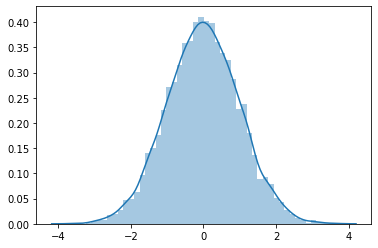

In [0]:
sns.distplot(x) 

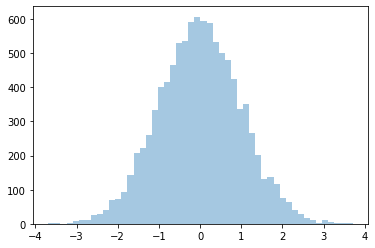

In [0]:
sns.distplot(x, kde=False)

## Sampling from the normally-distributed population

In [0]:
x_sample = np.random.choice(x, size=10, replace=False)
x_sample

array([-0.98305864, -1.30834182,  0.27523993,  0.83480235, -0.60122655,
        1.1563367 , -0.10724061, -0.07554101,  0.32004786, -1.37220148])

In [0]:
stat.mean(x_sample)

-0.18611832729025957

In [0]:
def sample_mean_calculator(population_array, sample_size, n_samples):
  sample_means = []
  for i in range(n_samples):
    sample = np.random.choice(population_array, size=sample_size, replace=False)
    sample_mean = stat.mean(sample)
    sample_means.append(sample_mean)
  return sample_means

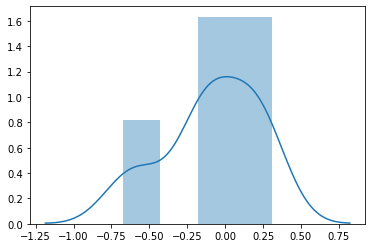

In [0]:
_ = sns.distplot(sample_mean_calculator(x, 10, 10))

###### The more samples we take, the more likely that the sampling distribution of the means will be normally-distributed: 

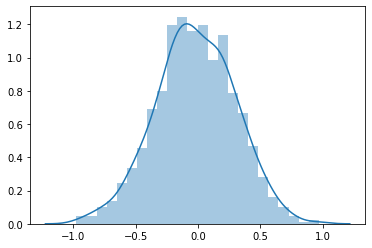

In [0]:
_ = sns.distplot(sample_mean_calculator(x, 10, 1000))

###### The larger the sample, the tighter the sample means will tend to be around the population mean:

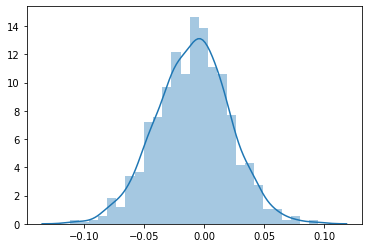

In [0]:
_ = sns.distplot(sample_mean_calculator(x, 1000, 1000))

## Sampling from a skewed population

In [0]:
from scipy.stats import skewnorm

In [0]:
s = skewnorm.rvs(12, size=10000)

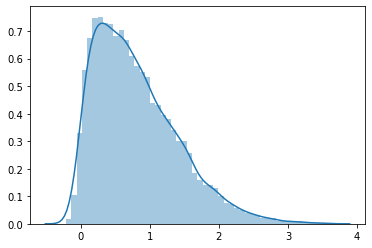

In [0]:
sns.distplot(s)

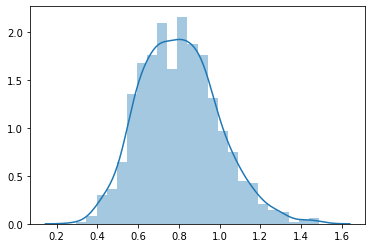

In [0]:
_ = sns.distplot(sample_mean_calculator(s, 10, 1000))

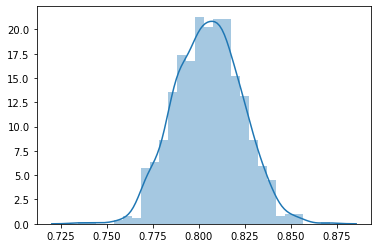

In [0]:
_ = sns.distplot(sample_mean_calculator(s, 1000, 1000))

## Sampling from a multimodal distribution

In [0]:
m = np.concatenate((np.random.normal(size=10000), np.random.normal(loc = 4.0, size=10000)))

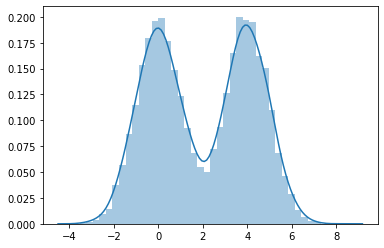

In [0]:
_ = sns.distplot(m)

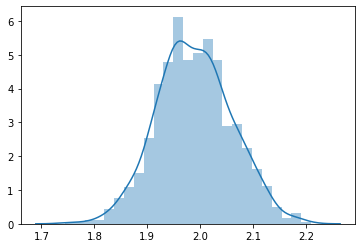

In [0]:
_ = sns.distplot(sample_mean_calculator(m, 1000, 1000))

## Sampling means from *any* distribution produces a normal sampling distribution

###### Even when sampling from a uniform population:

In [0]:
u = np.random.uniform(size=10000)

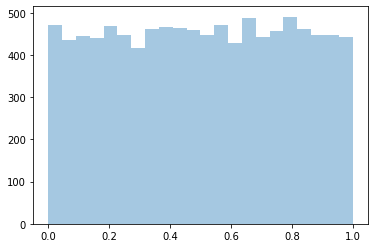

In [0]:
_ = sns.distplot(u, kde=False)

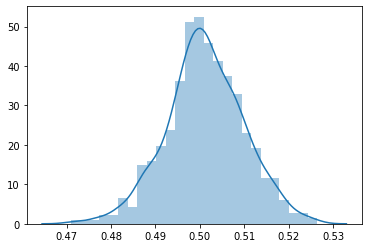

In [0]:
_ = sns.distplot(sample_mean_calculator(u, 1000, 1000))

Therefore, with large enough sample sizes, we can assume the sampling distribution of the means will be normally distributed, allowing us to run statistical tests that are configured for normal distributions. All of the most popular statistical tests are configured this way.

As an example of such a statistical test, the "*t*-test" allows us to infer whether two samples come from different populations (say, an experimental group and a control group). Thanks to the central limit theorem, we can use this test *even if we have no idea what the underlying distribution of the population is*, which is most of the time.